📦 Installing TensorFlow Hub for Pretrained Model Access:

In [9]:
!pip install tensorflow_hub

Importing Libraries for Image Processing and Deep Learning:

In [35]:
import tensorflow_hub as hub
from tensorflow.keras.utils import load_img
import tensorflow as tf 
from matplotlib import pyplot as plt 
import numpy as np
import cv2

Loading Pretrained Model for Arbitrary Image Stylization:

In [37]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Defining Function to Load and Preprocess Image for Model Input:

In [38]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_imagae(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

Loading Content and Style Images for Neural Style Transfer:

In [43]:
content_image = load_img(r'C:\Users\prasa\Downloads\photo.jpeg')
style_image = load_img(r'C:\Users\prasa\Downloads\vangoh.jpeg')

Converting Content Image to Numpy Array and Printing its Shape:

In [47]:
import numpy as np

image_array = np.array(content_image)
print(image_array.shape)

(180, 120, 3)


Updated Function to Load, Resize, and Preprocess Image for Model Input:

In [49]:
import tensorflow as tf

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (256, 256))  # resize image
    img = img[tf.newaxis, :]  # add batch dimension
    return img

Loading and Resizing Content Image, and Printing its Shape after Preprocessing:

In [53]:
content_image = load_image(r'C:\Users\prasa\Downloads\photo.jpeg')
print(content_image.shape)  # Works: (1, 256, 256, 3)

(1, 256, 256, 3)


Checking Shape of Preprocessed Content Image:

In [55]:
content_image.shape

TensorShape([1, 256, 256, 3])

Displaying Content Image After Removing Batch Dimension:

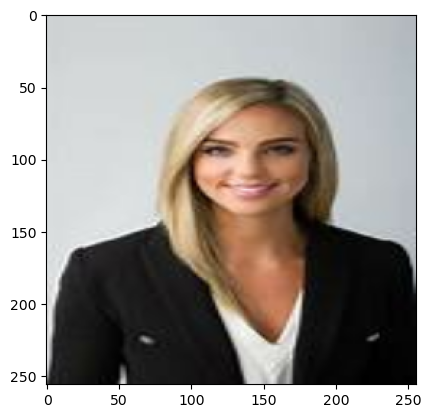

In [57]:
plt.imshow(np.squeeze(content_image))
plt.show()

Displaying Style Image After Removing Batch Dimension:

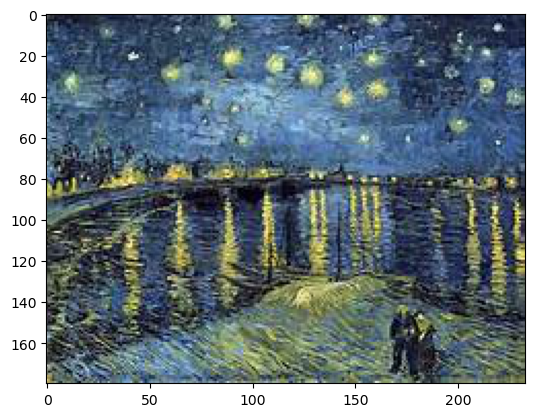

In [59]:
plt.imshow(np.squeeze(style_image))
plt.show()

Function to Load, Resize, and Preprocess Image with Customizable Target Size:

In [69]:
import tensorflow as tf

def load_image(img_path, target_size=(256, 256)):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32) 
    img = tf.image.resize(img, target_size)
    img = img[tf.newaxis, :]
    return img

Loading and Preprocessing Content and Style Images with Custom Target Size:

In [71]:
content_image = load_image(r'C:\Users\prasa\Downloads\photo.jpeg')
style_image = load_image(r'C:\Users\prasa\Downloads\vangoh.jpeg')

Generating Stylized Image Using Pretrained Model:

In [73]:
stylized_image = model(content_image, style_image)[0]

Displaying the Stylized Image After Applying Neural Style Transfer:

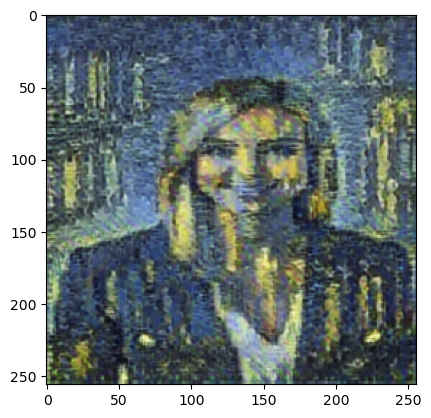

In [77]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

Saving the Stylized Image to a Specified Location:

In [90]:
tf.keras.utils.save_img(r"C:\Users\prasa\Downloads\stylized_output.jpg", tf.squeeze(stylized_image, axis=0))